In [18]:
import pandas as pd

df = pd.read_csv("datasets/expt_gap.csv")
print(df.shape)

(2154, 35)


In [19]:
df.head()


,composition,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData mode Electronegativity,MagpieData maximum Row,MagpieData range Row,MagpieData minimum Column,MagpieData mean Column,MagpieData avg_dev Column,...,MagpieData mean NValence,MagpieData avg_dev NValence,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData mean NpUnfilled,MagpieData avg_dev NpUnfilled,MagpieData maximum NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,gap expt
0,Ag0.5Ge1Pb1.75S4,2.58,0.65,2.396207,2.58,6.0,3.0,11.0,14.896552,1.217598,...,12.758621,7.700357,4.0,4.0,2.620690,1.046373,4.0,2.689655,0.994055,1.83
1,Ag0.5Ge1Pb1.75Se4,2.55,0.62,2.379655,2.55,6.0,2.0,11.0,14.896552,1.217598,...,18.275862,4.694411,4.0,4.0,2.620690,1.046373,4.0,2.689655,0.994055,1.51
2,Ag2GeS3,2.58,0.65,2.268333,2.58,5.0,2.0,11.0,14.000000,2.000000,...,9.000000,3.000000,4.0,4.0,1.666667,1.111111,4.0,2.000000,0.666667,1.98
3,Ag2GeSe3,2.55,0.62,2.253333,2.55,5.0,1.0,11.0,14.000000,2.000000,...,14.000000,2.000000,4.0,4.0,1.666667,1.111111,4.0,2.000000,0.666667,0.90
4,Ag2HgI4,2.66,0.73,2.357143,2.66,6.0,1.0,11.0,14.571429,2.775510,...,16.571429,3.183673,1.0,1.0,0.571429,0.489796,1.0,0.857143,0.244898,2.47


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   composition                           2154 non-null   object 
 1   MagpieData maximum Electronegativity  2154 non-null   float64
 2   MagpieData range Electronegativity    2154 non-null   float64
 3   MagpieData mean Electronegativity     2154 non-null   float64
 4   MagpieData mode Electronegativity     2154 non-null   float64
 5   MagpieData maximum Row                2154 non-null   float64
 6   MagpieData range Row                  2154 non-null   float64
 7   MagpieData minimum Column             2154 non-null   float64
 8   MagpieData mean Column                2154 non-null   float64
 9   MagpieData avg_dev Column             2154 non-null   float64
 10  MagpieData mode Column                2154 non-null   float64
 11  MagpieData maximu

In [21]:
df.isna().sum()

composition                             0
MagpieData maximum Electronegativity    0
MagpieData range Electronegativity      0
MagpieData mean Electronegativity       0
MagpieData mode Electronegativity       0
MagpieData maximum Row                  0
MagpieData range Row                    0
MagpieData minimum Column               0
MagpieData mean Column                  0
MagpieData avg_dev Column               0
MagpieData mode Column                  0
MagpieData maximum CovalentRadius       0
MagpieData range CovalentRadius         0
MagpieData mean CovalentRadius          0
MagpieData avg_dev CovalentRadius       0
MagpieData minimum NsValence            0
MagpieData maximum NsValence            0
MagpieData mean NsValence               0
MagpieData mode NsValence               0
MagpieData range NpValence              0
MagpieData mean NpValence               0
MagpieData avg_dev NpValence            0
MagpieData minimum NValence             0
MagpieData maximum NValence       

In [22]:
# Separate features and target variable
X = df.drop(columns=['composition','gap expt'])
y = df['gap expt']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)

MSE: 0.6809638131362352
R²: 0.6725403959990206


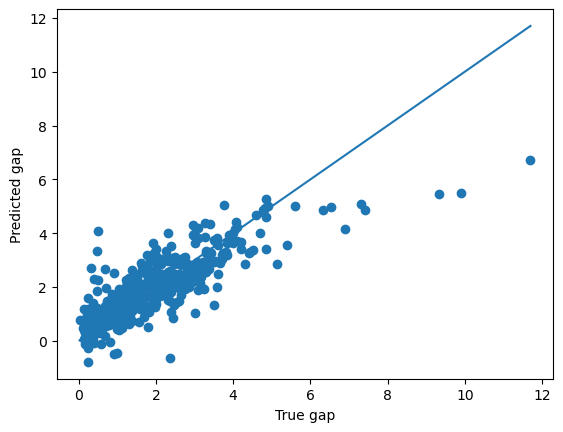

In [27]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("True gap")
plt.ylabel("Predicted gap")
plt.show()

In [32]:
import plotly.express as px
import plotly.graph_objects as go 

refrence_line = go.Scatter(
    x=[0, 12],
    y=[0,12] ,
    line=dict(color='red', dash='dash'),
    mode="lines",
    showlegend=False
)

fig = px.scatter(
    x=y_test,
    y=y_pred,
    color_continuous_scale=px.colors.sequential.Bluered
)

fig.add_trace(refrence_line)
fig.show()